In [1]:
import pandas as pd
import os
import numpy as np

# For some reason, the day 2021-11-23 is not complete, 
it has ~ 570 missing minutes

In [2]:
df.sort_values('open_time',ascending=False)

NameError: name 'df' is not defined

In [3]:
def get_num_days_since_update():
    from datetime import datetime
    df = pd.read_csv(f'./../../Storage/TechnicalIndicators/Full_Data_klines_with_technical_indicators.csv')
    df.sort_values('open_time')
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True,inplace=True)
    last_entry_dt = (df['open_time'].iloc[-1])

    last_entry_datetime = datetime.strptime(last_entry_dt, '%Y-%m-%d %H:%M:%S')

    import datetime
    base = datetime.datetime.today()
    num_days_since_last_entry = str(base -  last_entry_datetime).split(' ')[0]
    return num_days_since_last_entry

def get_date_list():

    num_days_since_last_entry = get_num_days_since_update()
    
    import datetime
    base = datetime.datetime.today()
    try:
        date_list = [base - datetime.timedelta(days=x) for x in range(int(num_days_since_last_entry)+1)]
        return date_list
    except Exception as e:
        print(f'Less than a day has passd since last entry')

In [4]:

import pandas as pd
df = pd.read_csv('./../../Database/Futures_um/klines/Full_Data_2klines.csv')

df['open_time'] = pd.to_datetime(df['open_time'])

# Get the range of dates and set the frequency to be 1 minute
date_range = pd.date_range(start=df['open_time'].min(), end=df['open_time'].max(), freq='min')

# Find the missing dates by comparing the date range to the unique values in the datetime column
missing_dates = date_range[~date_range.isin(df['open_time'])]
print(missing_dates)


DatetimeIndex(['2021-11-23 14:21:00', '2021-11-23 14:22:00',
               '2021-11-23 14:23:00', '2021-11-23 14:24:00',
               '2021-11-23 14:25:00', '2021-11-23 14:26:00',
               '2021-11-23 14:27:00', '2021-11-23 14:28:00',
               '2021-11-23 14:29:00', '2021-11-23 14:30:00',
               ...
               '2021-11-23 23:50:00', '2021-11-23 23:51:00',
               '2021-11-23 23:52:00', '2021-11-23 23:53:00',
               '2021-11-23 23:54:00', '2021-11-23 23:55:00',
               '2021-11-23 23:56:00', '2021-11-23 23:57:00',
               '2021-11-23 23:58:00', '2021-11-23 23:59:00'],
              dtype='datetime64[ns]', length=579, freq='T')


# Merge into Single DF

In [33]:
# Merge into single df
def merge_tables_into_single_df(init=False):
    my_dict={}
    if init:
        pass
    else:
        
        date_list = get_date_list()
        dt = date_list[-2]
        import datetime
        dt_midnight = datetime.datetime(dt.year, dt.month, dt.day, 0, 0, 0)
    for i in ['df_min','df_5min','df_10min','df_15min','df_30min','df_hour','df_2hour','df_4hour','df_8hour','df_12hour','df_day','df_week']:
        
        my_dict[i]=pd.read_csv(f"./../../Storage/TechnicalIndicators/{i}/{i.split('_')[1]}_data.csv")
        my_dict[i].drop_duplicates(inplace=True)
        if init:
            pass
        else:
            print(f'Start at {i}')
            
            print(f"Changing Datetime for {i}, {dt} was the last date")
            my_dict[i]['open_time'] = pd.to_datetime(my_dict[i]['open_time'] )
            df_update = my_dict[i].loc[my_dict[i]['open_time']>=dt_midnight]
            #df_update = df_update.fillna(method='ffill')
            #df_update = df_update.fillna(method='bfill')
            my_dict[i] = df_update
        #print(f"FInished with {i}, updated to start from {dt_midnight}")
            

    
    return my_dict

my_dict = merge_tables_into_single_df(init=True)

In [34]:
def date_to_datetimes( key,column):
    from datetime import date
    from datetime import datetime
    
    if (key=='df_day') or (key=='df_week'):
        print(f"We have entered the key: {key}")
      
        my_dict[key][column] = pd.to_datetime(my_dict[key][column], format='%Y-%m-%d')
        my_dict[key][column]  = my_dict[key][column].apply(lambda x: x.replace(hour=0, minute=1, second=0, microsecond=0))


        #my_dict[key][column]  = my_dict[key][column].apply(lambda x: datetime.combine(datetime.strptime(x,'%Y-%m-%d'), datetime.min.time()) )
        #my_dict[key][column]  = pd.to_datetime(my_dict[key][column])
        #my_dict[key][column] = pd.to_datetime(my_dict[key][column]).dt.floor('D')
    else:
        my_dict[key][column] = my_dict[key][column].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) 
        my_dict[key][column]  = pd.to_datetime(my_dict[key][column])

    return my_dict
    

for i in list(my_dict.keys()):
    print(i)
    my_dict = date_to_datetimes(i,'open_time')
    

df_min
df_5min
df_10min
df_15min
df_30min
df_hour
df_2hour
df_4hour
df_8hour
df_12hour
df_day
We have entered the key: df_day
df_week
We have entered the key: df_week


In [35]:
my_dict.keys()

dict_keys(['df_min', 'df_5min', 'df_10min', 'df_15min', 'df_30min', 'df_hour', 'df_2hour', 'df_4hour', 'df_8hour', 'df_12hour', 'df_day', 'df_week'])

In [36]:
my_dict['df_week']

,open_time,open_week,high_week,low_week,close_week,volume_week,close_time_week,quote_volume_week,count_week,taker_buy_volume_week,...,Keltner_Upper_week,Keltner_Middle_week,Keltner_Lower_week,ADL_week,MFI_14_week,VWAP_week,CMF_week,ATR_week,CCI_20_week,OBV_week
0,2021-01-17 00:01:00,36382.069501,36416.085827,36347.784234,36381.962384,7892.467,1.610681e+12,2.864242e+08,110811,3789.286,...,NaN,NaN,NaN,6.321687,NaN,36381.944148,NaN,NaN,NaN,0.000
1,2021-01-24 00:01:00,33918.818165,33948.955962,33888.417143,33918.433115,8401.730,1.611230e+12,2.852408e+08,114048,4239.344,...,NaN,NaN,NaN,-64.023703,NaN,35111.778149,NaN,NaN,NaN,-8401.730
2,2021-01-31 00:01:00,32964.609375,32997.457024,32932.065417,32964.416181,6897.267,1.611835e+12,2.276783e+08,103428,4133.063,...,NaN,NaN,NaN,-136.810745,NaN,34473.209481,NaN,NaN,NaN,-15298.997
3,2021-02-07 00:01:00,36983.382778,37009.313452,36958.376101,36982.953839,6406.055,1.612440e+12,2.378119e+08,89696,2566.399,...,NaN,NaN,NaN,-360.905422,NaN,35016.544391,NaN,NaN,NaN,-8892.942
4,2021-02-14 00:01:00,46285.988075,46322.451300,46249.680635,46284.899454,8958.217,1.613045e+12,4.146152e+08,128993,2774.692,...,NaN,NaN,NaN,-648.105647,NaN,37634.866512,NaN,NaN,NaN,65.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2023-03-26 00:01:00,27861.245079,27873.711597,27848.640823,27861.244236,589947.195,1.679573e+12,1.647724e+10,6216415,292818.998,...,22726.196206,20311.799205,17897.402204,-264677.656978,99.995555,27102.057830,-0.001173,1352.184009,156.020666,502538.986
115,2023-04-02 00:01:00,28000.827450,28009.183046,27992.321369,28000.844911,413625.064,1.680178e+12,1.155309e+10,4407483,206553.524,...,22963.999169,20817.812503,18671.625837,-260129.540022,99.995651,27111.431206,0.002820,1332.944789,139.281520,916164.050
116,2023-04-09 00:01:00,28105.262378,28113.145052,28097.075729,28105.240312,196228.299,1.680653e+12,5.514903e+09,2230611,96380.029,...,23423.185058,21391.723957,19360.262857,-256956.494255,99.995707,27116.323870,0.005110,1330.372915,128.391973,1112392.349
117,2023-04-09 00:01:00,28053.584425,28059.306925,28047.736062,28053.603254,256627.022,1.680782e+12,7.207582e+09,2887559,126720.326,...,23415.219392,21389.142104,19363.064816,-256502.833982,99.995713,27117.488358,0.005124,1326.527334,127.539360,1172791.072


In [37]:
merge1 = pd.merge(my_dict['df_min'] , my_dict['df_5min'] , on = 'open_time' , how='left')
merge2 = pd.merge(merge1 , my_dict['df_10min'] , on = 'open_time' , how='left')
merge3 = pd.merge(merge2 , my_dict['df_15min'] , on = 'open_time' , how='left')
merge4 = pd.merge(merge3 , my_dict['df_30min'] , on = 'open_time' , how='left')
merge5 = pd.merge(merge4 , my_dict['df_hour'] , on = 'open_time' , how='left')
merge6 = pd.merge(merge5 , my_dict['df_2hour'] , on = 'open_time' , how='left')
merge7 = pd.merge(merge6 , my_dict['df_4hour'] , on = 'open_time' , how='left')
merge8 = pd.merge(merge7 , my_dict['df_8hour'] , on = 'open_time' , how='left')
merge9 = pd.merge(merge8 , my_dict['df_12hour'] , on = 'open_time' , how='left')
merge10 = pd.merge(merge9 , my_dict['df_day'] , on = 'open_time' , how='left')
merge11 = pd.merge(merge10 , my_dict['df_week'] , on = 'open_time' , how='left')

In [98]:
df_tehcnical_data_source = pd.read_csv('./../../Storage/TechnicalIndicators/Full_Data_klines_with_technical_indicators.csv')

pruv = merge11

KeyboardInterrupt: 

In [38]:
merge11

,open_time,open_min,high_min,low_min,close_min,volume_min,close_time_min,quote_volume_min,count_min,taker_buy_volume_min,...,Keltner_Upper_week,Keltner_Middle_week,Keltner_Lower_week,ADL_week,MFI_14_week,VWAP_week,CMF_week,ATR_week,CCI_20_week,OBV_week
0,2021-01-12 07:00:00,36060.5,36060.5,36060.5,36060.5,0.469,1.610435e+12,16912.3745,1,0.469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-12 07:01:00,36042.0,36042.0,36042.0,36042.0,0.001,1.610435e+12,36.0420,1,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-12 07:02:00,36042.0,36042.0,35856.5,35856.5,0.906,1.610435e+12,32546.3687,4,0.905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-12 07:03:00,35829.1,35843.3,35824.0,35843.3,4.397,1.610435e+12,157547.2001,12,2.849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-12 07:04:00,35834.3,35848.1,35807.9,35815.6,4.650,1.610435e+12,166610.1238,9,3.636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181464,2023-04-11 23:55:00,30244.9,30245.0,30232.0,30232.1,19.360,1.681257e+12,585371.0273,233,2.281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181465,2023-04-11 23:56:00,30232.0,30239.3,30228.7,30239.3,13.031,1.681257e+12,393944.5501,173,9.860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181466,2023-04-11 23:57:00,30239.3,30239.3,30224.9,30224.9,20.222,1.681257e+12,611305.3757,215,1.291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181467,2023-04-11 23:58:00,30224.3,30224.3,30224.1,30224.1,4.623,1.681258e+12,139726.1333,82,1.184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
merge11[merge11.columns.tolist()[-20:]].fillna(method='ffill').fillna(method='bfill').dropna(axis=1)

,Chikou_Span__ichimoku_week,Donchian_High_week,Donchian_Middle_week,Donchian_Low_week,Pivot_Points_week,Pivot_Support_1_week,Pivot_Support_2_week,Pivot_Resistance_1_week,Pivot_Resistance_2_week,Keltner_Upper_week,Keltner_Middle_week,Keltner_Lower_week,ADL_week,MFI_14_week,VWAP_week,CMF_week,ATR_week,CCI_20_week,OBV_week
0,32303.233988,61239.734613,47085.900015,32932.065417,36381.944148,36347.802470,36313.642555,36416.104063,36450.245742,56600.056247,48903.396688,41206.737130,6.321687,99.997964,36381.944148,-0.017920,3180.668989,-99.045138,0.000
1,32303.233988,61239.734613,47085.900015,32932.065417,36381.944148,36347.802470,36313.642555,36416.104063,36450.245742,56600.056247,48903.396688,41206.737130,6.321687,99.997964,36381.944148,-0.017920,3180.668989,-99.045138,0.000
2,32303.233988,61239.734613,47085.900015,32932.065417,36381.944148,36347.802470,36313.642555,36416.104063,36450.245742,56600.056247,48903.396688,41206.737130,6.321687,99.997964,36381.944148,-0.017920,3180.668989,-99.045138,0.000
3,32303.233988,61239.734613,47085.900015,32932.065417,36381.944148,36347.802470,36313.642555,36416.104063,36450.245742,56600.056247,48903.396688,41206.737130,6.321687,99.997964,36381.944148,-0.017920,3180.668989,-99.045138,0.000
4,32303.233988,61239.734613,47085.900015,32932.065417,36381.944148,36347.802470,36313.642555,36416.104063,36450.245742,56600.056247,48903.396688,41206.737130,6.321687,99.997964,36381.944148,-0.017920,3180.668989,-99.045138,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181464,28105.240312,28059.306925,22206.805853,16354.304782,28053.548747,28047.790569,28041.977884,28059.361432,28065.119610,23415.219392,21389.142104,19363.064816,-256502.833982,99.995713,27117.488358,0.005124,1326.527334,127.539360,1172791.072
1181465,28105.240312,28059.306925,22206.805853,16354.304782,28053.548747,28047.790569,28041.977884,28059.361432,28065.119610,23415.219392,21389.142104,19363.064816,-256502.833982,99.995713,27117.488358,0.005124,1326.527334,127.539360,1172791.072
1181466,28105.240312,28059.306925,22206.805853,16354.304782,28053.548747,28047.790569,28041.977884,28059.361432,28065.119610,23415.219392,21389.142104,19363.064816,-256502.833982,99.995713,27117.488358,0.005124,1326.527334,127.539360,1172791.072
1181467,28105.240312,28059.306925,22206.805853,16354.304782,28053.548747,28047.790569,28041.977884,28059.361432,28065.119610,23415.219392,21389.142104,19363.064816,-256502.833982,99.995713,27117.488358,0.005124,1326.527334,127.539360,1172791.072


In [44]:
merge11

,open_time,open_min,high_min,low_min,close_min,volume_min,close_time_min,quote_volume_min,count_min,taker_buy_volume_min,...,Keltner_Upper_week,Keltner_Middle_week,Keltner_Lower_week,ADL_week,MFI_14_week,VWAP_week,CMF_week,ATR_week,CCI_20_week,OBV_week
0,2021-01-12 07:00:00,36060.5,36060.5,36060.5,36060.5,0.469,1.610435e+12,16912.3745,1,0.469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-12 07:01:00,36042.0,36042.0,36042.0,36042.0,0.001,1.610435e+12,36.0420,1,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-12 07:02:00,36042.0,36042.0,35856.5,35856.5,0.906,1.610435e+12,32546.3687,4,0.905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-12 07:03:00,35829.1,35843.3,35824.0,35843.3,4.397,1.610435e+12,157547.2001,12,2.849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-12 07:04:00,35834.3,35848.1,35807.9,35815.6,4.650,1.610435e+12,166610.1238,9,3.636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181464,2023-04-11 23:55:00,30244.9,30245.0,30232.0,30232.1,19.360,1.681257e+12,585371.0273,233,2.281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181465,2023-04-11 23:56:00,30232.0,30239.3,30228.7,30239.3,13.031,1.681257e+12,393944.5501,173,9.860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181466,2023-04-11 23:57:00,30239.3,30239.3,30224.9,30224.9,20.222,1.681257e+12,611305.3757,215,1.291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181467,2023-04-11 23:58:00,30224.3,30224.3,30224.1,30224.1,4.623,1.681258e+12,139726.1333,82,1.184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
def merge_into_single_df_with_technical_indicators(merge11,init=False):
    if init:
    
        df_merged = merge11.fillna(method='ffill')
        df_merged = df_merged.fillna(method='bfill')
        df.sort_values('open_time',inplace=True)
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True,inplace=True)
        df_merged.to_csv('./../../Storage/TechnicalIndicators/Full_Data_klines_with_technical_indicators.csv',index=False)
    
    else:
        
        try:
            #if pd.to_datetime(df_tehcnical_data_source['open_time']).iloc[-1] < pruv['open_time'].iloc[-1]:
                #date_list = get_date_list()
                #dt = date_list[-2]
                #import datetime
                #dt_midnight = datetime.datetime(dt.year, dt.month, dt.day, 0, 0, 0)
                
            #df_update = my_dict[i].loc[my_dict[i]['open_time']>=dt_midnight]
            df_update = merge11.fillna(method='ffill')
            df_update = df_update.fillna(method='bfill')
            df_update.to_csv('./../../Storage/TechnicalIndicators/Full_Data_klines_with_technical_indicators.csv',mode='a',index=False,header=False)
        except Exception as e:
            print(e, "\nLess than a day has passd since last entry" )
merge_into_single_df_with_technical_indicators(merge11,init = True)

In [84]:
my_dict['df_week'][my_dict['df_week'].columns.tolist()[-20:]].fillna(method='ffill').fillna(method='bfill').dropna(axis=1)

,Chikou_Span__ichimoku_week,Donchian_High_week,Donchian_Middle_week,Donchian_Low_week,Pivot_Points_week,Pivot_Support_1_week,Pivot_Support_2_week,Pivot_Resistance_1_week,Pivot_Resistance_2_week,Keltner_Upper_week,Keltner_Middle_week,Keltner_Lower_week,ADL_week,MFI_14_week,VWAP_week,CMF_week,ATR_week,CCI_20_week,OBV_week
0,32303.233988,61239.734613,47085.900015,32932.065417,36381.944148,36347.802470,36313.642555,36416.104063,36450.245742,56600.056247,48903.396688,41206.737130,6.321687,99.997964,36381.944148,-0.017920,3180.668989,-99.045138,0.000
1,32130.582837,61239.734613,47085.900015,32932.065417,33918.602073,33888.248185,33858.063254,33948.787004,33979.140893,56600.056247,48903.396688,41206.737130,-64.023703,99.997964,35111.778149,-0.017920,3180.668989,-99.045138,-8401.730
2,39755.249444,61239.734613,47085.900015,32932.065417,32964.646207,32931.835390,32899.254600,32997.226997,33030.037814,56600.056247,48903.396688,41206.737130,-136.810745,99.997964,34473.209481,-0.017920,3180.668989,-99.045138,-15298.997
3,40769.989147,61239.734613,47085.900015,32932.065417,36983.547798,36957.782143,36932.610446,37008.719494,37034.485149,56600.056247,48903.396688,41206.737130,-360.905422,99.997964,35016.544391,-0.017920,3180.668989,-99.045138,-8892.942
4,45878.992292,61239.734613,47085.900015,32932.065417,46285.677130,46248.902960,46212.906465,46321.673624,46358.447794,56600.056247,48903.396688,41206.737130,-648.105647,99.997964,37634.866512,-0.017920,3180.668989,-99.045138,65.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,28105.240312,27873.711597,22114.008189,16354.304782,27861.198886,27848.686174,27836.128112,27873.756948,27886.269659,22726.196206,20311.799205,17897.402204,-264677.656978,99.995555,27102.057830,-0.001173,1352.184009,156.020666,502538.986
115,28105.240312,28009.183046,22181.743914,16354.304782,28000.783108,27992.383171,27983.921432,28009.244848,28017.644785,22963.999169,20817.812503,18671.625837,-260129.540022,99.995651,27111.431206,0.002820,1332.944789,139.281520,916164.050
116,28105.240312,28113.145052,22233.724917,16354.304782,28105.153698,28097.162344,28089.084375,28113.231667,28121.223021,23423.185058,21391.723957,19360.262857,-256956.494255,99.995707,27116.323870,0.005110,1330.372915,128.391973,1112392.349
117,28105.240312,28059.306925,22206.805853,16354.304782,28053.548747,28047.790569,28041.977884,28059.361432,28065.119610,23415.219392,21389.142104,19363.064816,-256502.833982,99.995713,27117.488358,0.005124,1326.527334,127.539360,1172791.072


# Misc

In [14]:
pd.read_csv('./../../Storage/TechnicalIndicators/Full_Data_klines_with_technical_indicators.csv')

,open_time,open_min,high_min,low_min,close_min,volume_min,close_time_min,quote_volume_min,count_min,taker_buy_volume_min,...,Keltner_Upper_week,Keltner_Middle_week,Keltner_Lower_week,ADL_week,MFI_14_week,VWAP_week,CMF_week,ATR_week,CCI_20_week,OBV_week
0,2021-01-12 07:00:00,36060.500000,36060.500000,36060.500000,36060.500000,0.469,1.610435e+12,1.691237e+04,1,0.469,...,56600.056247,48903.396688,41206.73713,6.321687,99.997964,36381.944148,-0.01792,3180.668989,-99.045138,0.0
1,2021-01-12 07:01:00,36042.000000,36042.000000,36042.000000,36042.000000,0.001,1.610435e+12,3.604200e+01,1,0.001,...,56600.056247,48903.396688,41206.73713,6.321687,99.997964,36381.944148,-0.01792,3180.668989,-99.045138,0.0
2,2021-01-12 07:02:00,36042.000000,36042.000000,35856.500000,35856.500000,0.906,1.610435e+12,3.254637e+04,4,0.905,...,56600.056247,48903.396688,41206.73713,6.321687,99.997964,36381.944148,-0.01792,3180.668989,-99.045138,0.0
3,2021-01-12 07:03:00,35829.100000,35843.300000,35824.000000,35843.300000,4.397,1.610435e+12,1.575472e+05,12,2.849,...,56600.056247,48903.396688,41206.73713,6.321687,99.997964,36381.944148,-0.01792,3180.668989,-99.045138,0.0
4,2021-01-12 07:04:00,35834.300000,35848.100000,35807.900000,35815.600000,4.650,1.610435e+12,1.666101e+05,9,3.636,...,56600.056247,48903.396688,41206.73713,6.321687,99.997964,36381.944148,-0.01792,3180.668989,-99.045138,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171606,2023-04-06 23:58:00,28022.000000,28027.900000,28021.900000,28027.900000,6.150,1.680826e+12,1.723515e+05,228,6.034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171607,2023-04-06 23:59:00,28027.900000,28031.600000,28027.900000,28031.500000,4.412,1.680826e+12,1.236676e+05,177,4.301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171608,2023-04-09,28105.262378,28113.145052,28097.075729,28105.240312,196228.299,1.680653e+12,5.514903e+09,2230611,96380.029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171609,2023-04-09,28053.584425,28059.306925,28047.736062,28053.603254,256627.022,1.680782e+12,7.207582e+09,2887559,126720.326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import re
import pandas as pd


columns = pruv.columns.tolist()

result = [col for col in columns if re.search("RSI", col)]

print(result)

['RSI_14_min', 'RSI_14_5min', 'RSI_14_10min', 'RSI_14_15min', 'RSI_14_30min', 'RSI_14_hour', 'RSI_14_2hour', 'RSI_14_4hour', 'RSI_14_8hour', 'RSI_14_12hour', 'RSI_14_day', 'RSI_14_week']


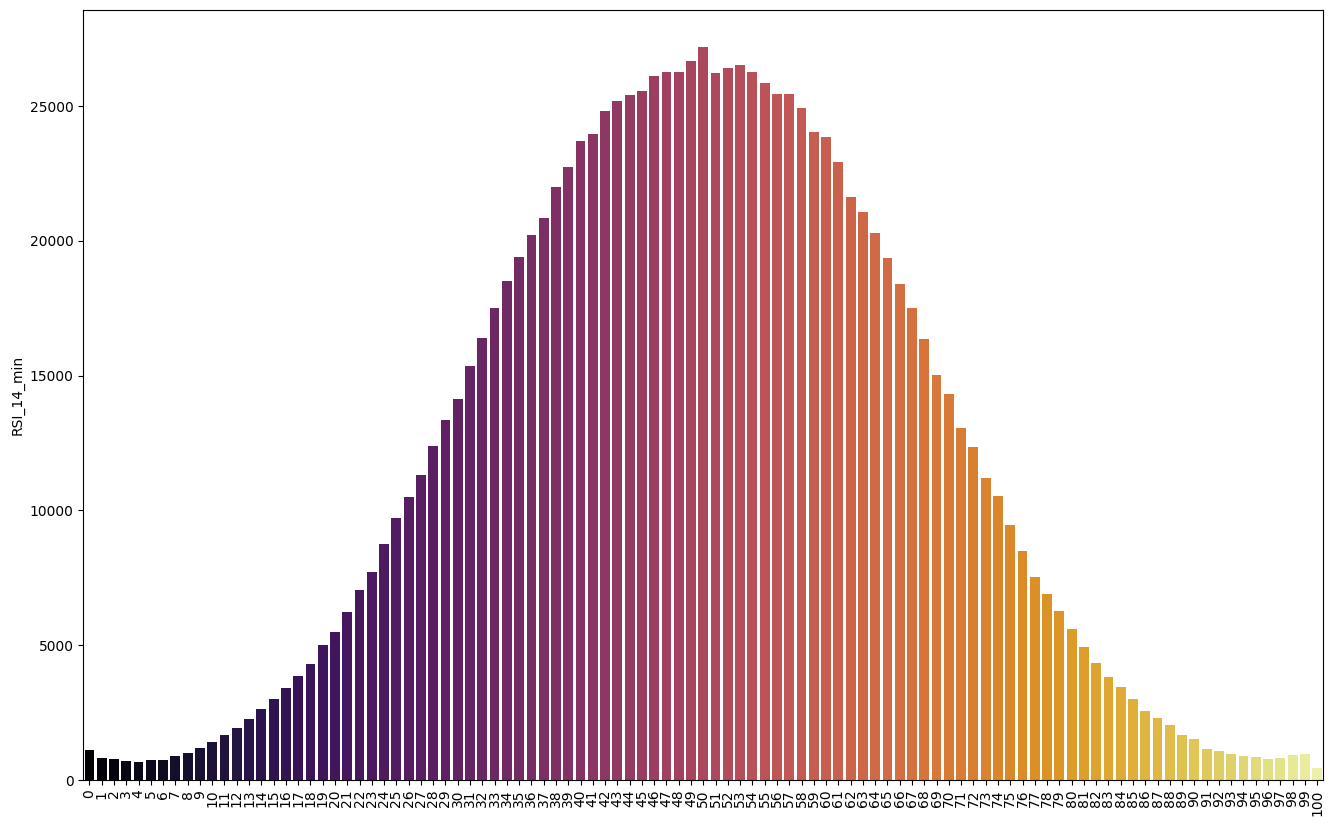

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
ax , fig = plt.subplots(figsize=(16,10))
sns.barplot(x = \
    pruv['RSI_14_min'].apply(lambda x : int(str(np.round(x)).split('.')[0])).value_counts().sort_index().index, \
    y = \
    pruv['RSI_14_min'].apply(lambda x : int(str(np.round(x)).split('.')[0])).value_counts().sort_index(), \
    palette='inferno')
plt.xticks(rotation=90)
plt.show()